A chemist had two chemical flasks labeled 0 and 1 which consist of two
different chemicals. He extracted 3 features from these chemicals in order to
distinguish between them, you provided the results derived by the chemicals and
your task is to create a model that will label chemical 0 or 1 given its three features
and built-in docker and use some library to display that in frontend.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
df=pd.read_csv("data\indian_liver_patient.csv")

In [14]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [15]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [16]:
df.duplicated().sum()

13

In [18]:
df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [12]:
df.info

AttributeError: 'function' object has no attribute 'info'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [24]:
df.shape

(583, 11)

In [25]:
## Independent and dependent feature
X = df.drop(labels=['Dataset'],axis=1)
Y = df[['Dataset']]

In [34]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = X.select_dtypes(include='object') .columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')
categorical columns:  Index(['Gender'], dtype='object')


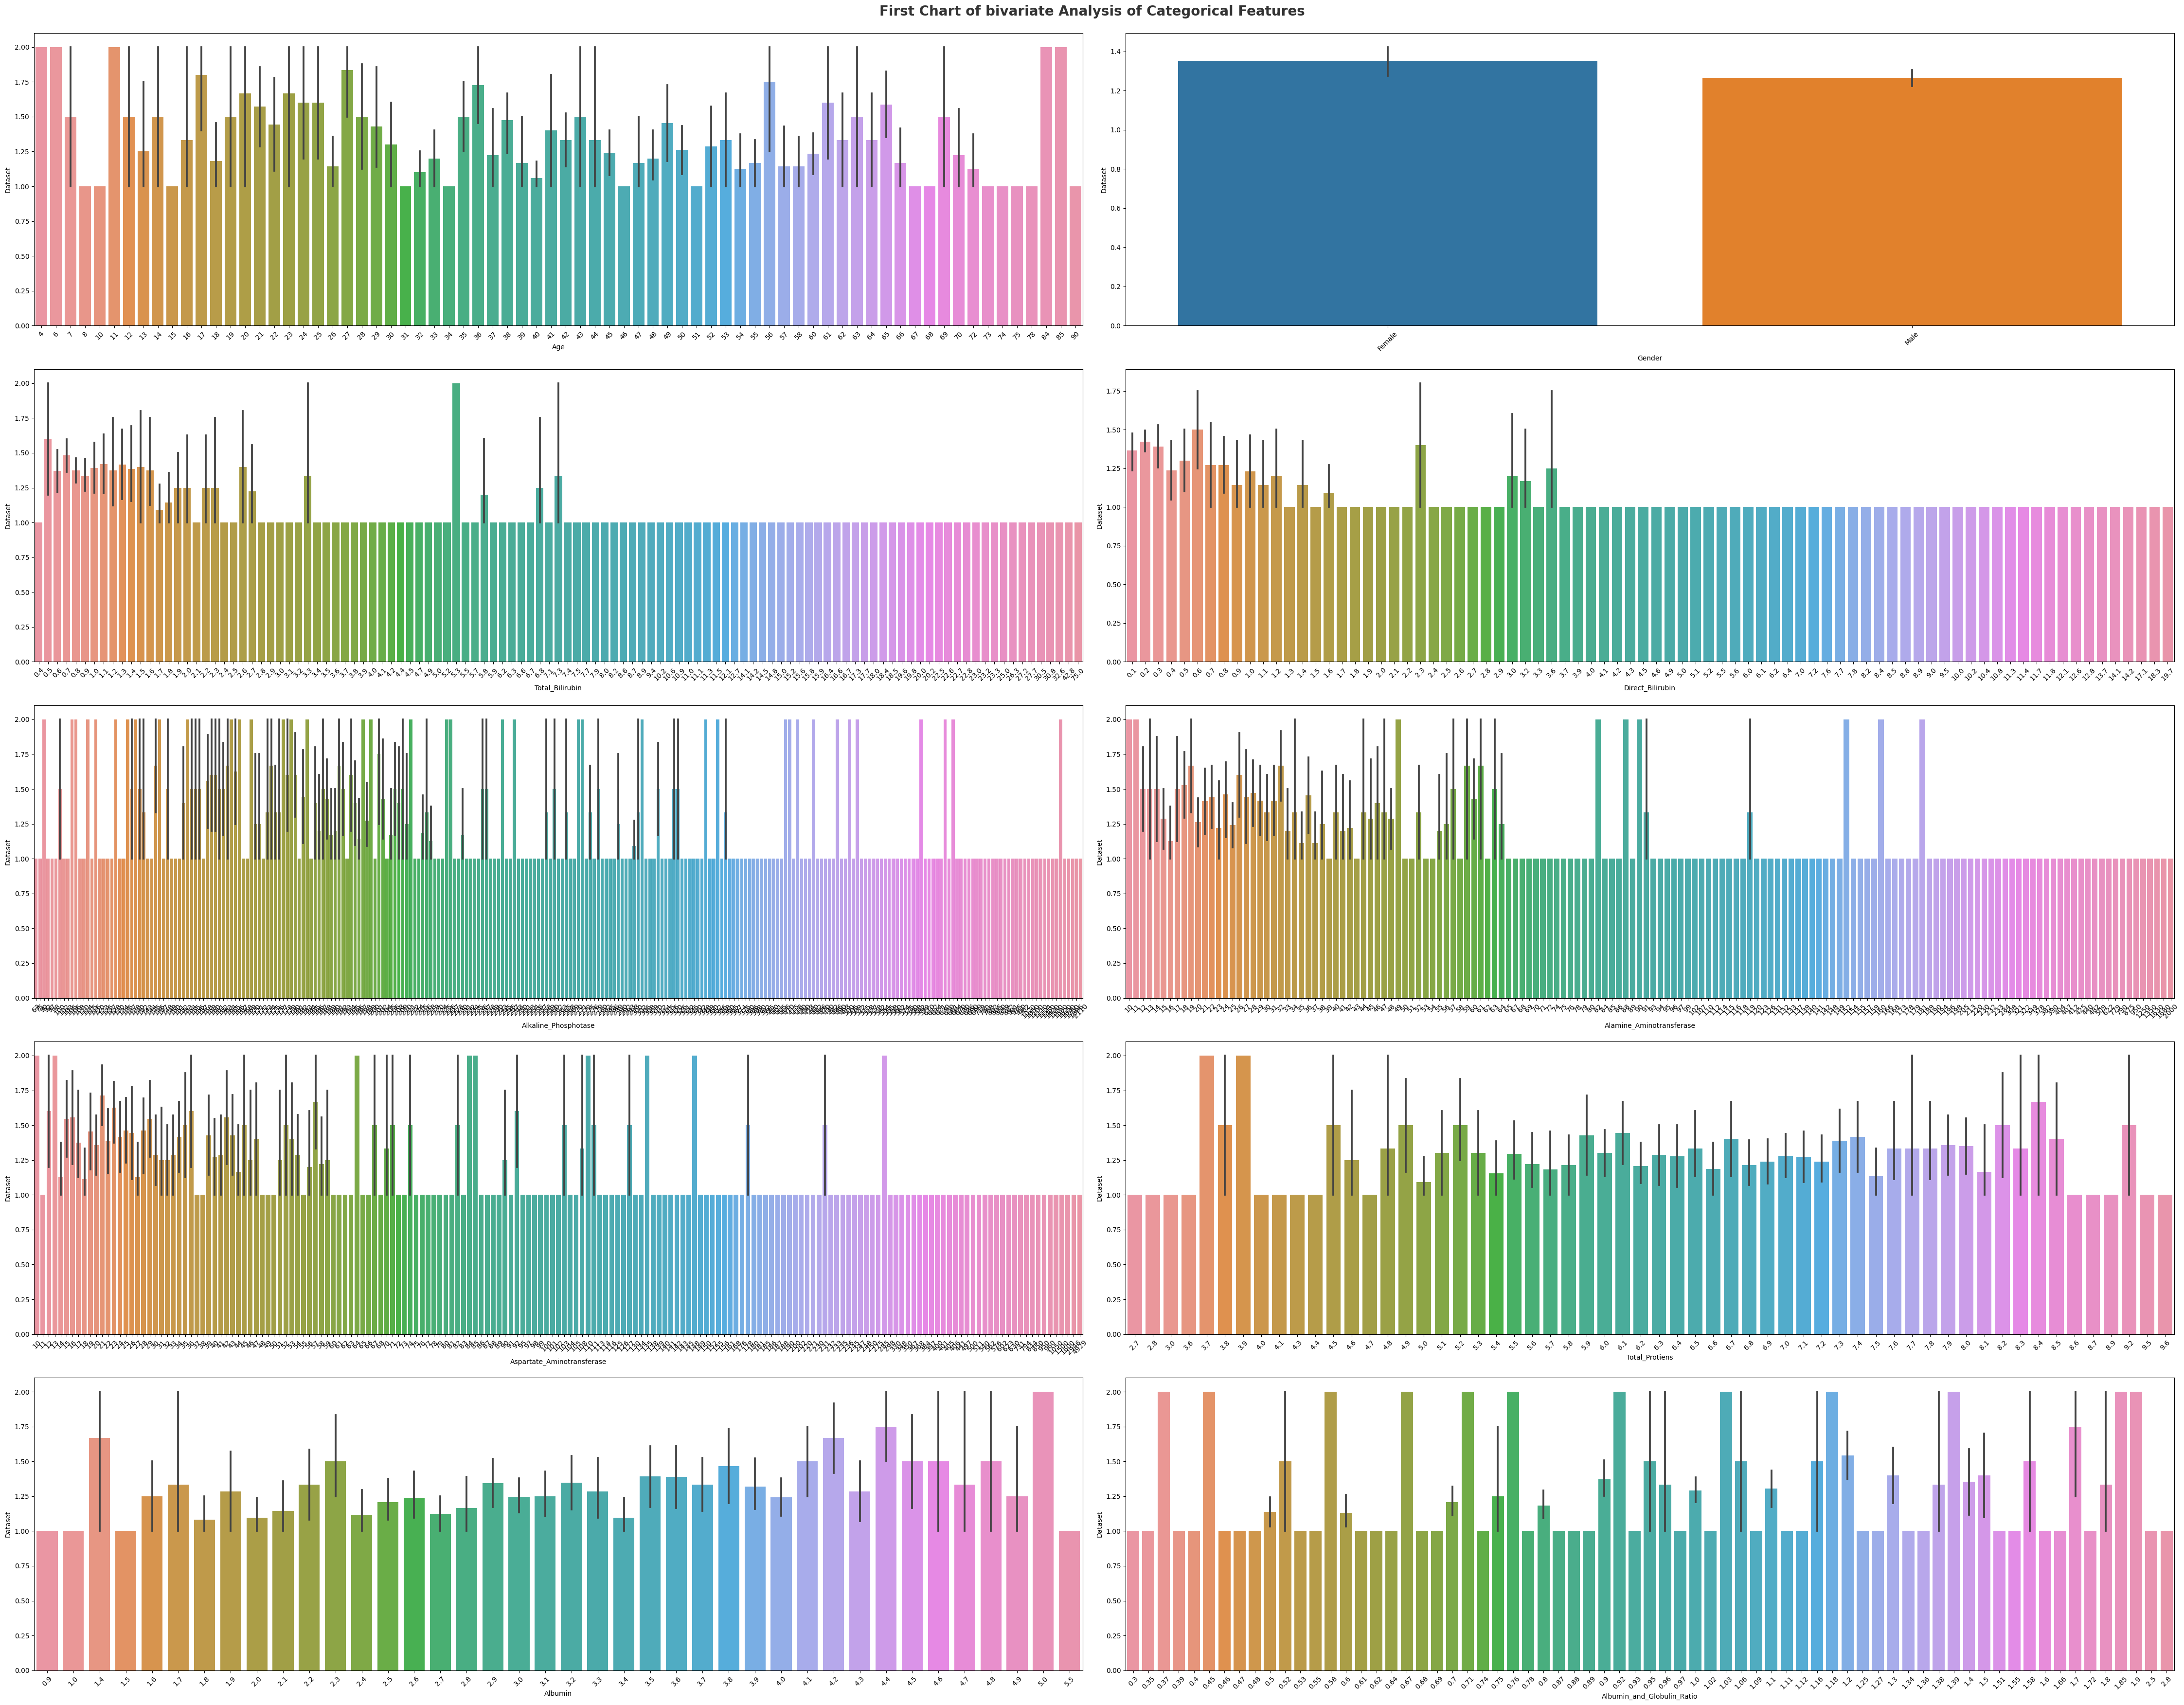

In [30]:
# plot for numerical columns
plt.figure(figsize=(45, 35))
plt.suptitle('First Chart of bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_cols)):
    plt.subplot(5, 2, i+1)
    sns.barplot(data = df, x = df[numerical_cols[i]], y='Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [38]:
# Define the custom ranking for each ordinal variable
Gender = ['Female', 'Male']

In [39]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines A
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [40]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Gender])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [41]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipeline__Age,num_pipeline__Total_Bilirubin,num_pipeline__Direct_Bilirubin,num_pipeline__Alkaline_Phosphotase,num_pipeline__Alamine_Aminotransferase,num_pipeline__Aspartate_Aminotransferase,num_pipeline__Total_Protiens,num_pipeline__Albumin,num_pipeline__Albumin_and_Globulin_Ratio,cat_pipeline__Gender
0,1.521598,-0.429526,-0.495232,5.429707,0.054658,0.033501,-1.751896,-1.338053,-0.487231,-1.798990
1,-0.845149,-0.318923,-0.350905,-0.432725,-0.280949,-0.269359,0.273413,0.302490,0.127913,0.555868
2,-1.037048,-0.397925,-0.423069,-0.408230,-0.326714,-0.326743,-2.212193,-0.959466,1.358200,0.555868
3,1.009869,-0.160920,-0.314824,-0.073467,-0.026701,-0.208787,0.089294,0.428686,0.435485,0.555868
4,0.242275,-0.382125,-0.459150,-0.477632,-0.296204,-0.285299,-0.278944,-0.076096,0.127913,-1.798990


<AxesSubplot: >

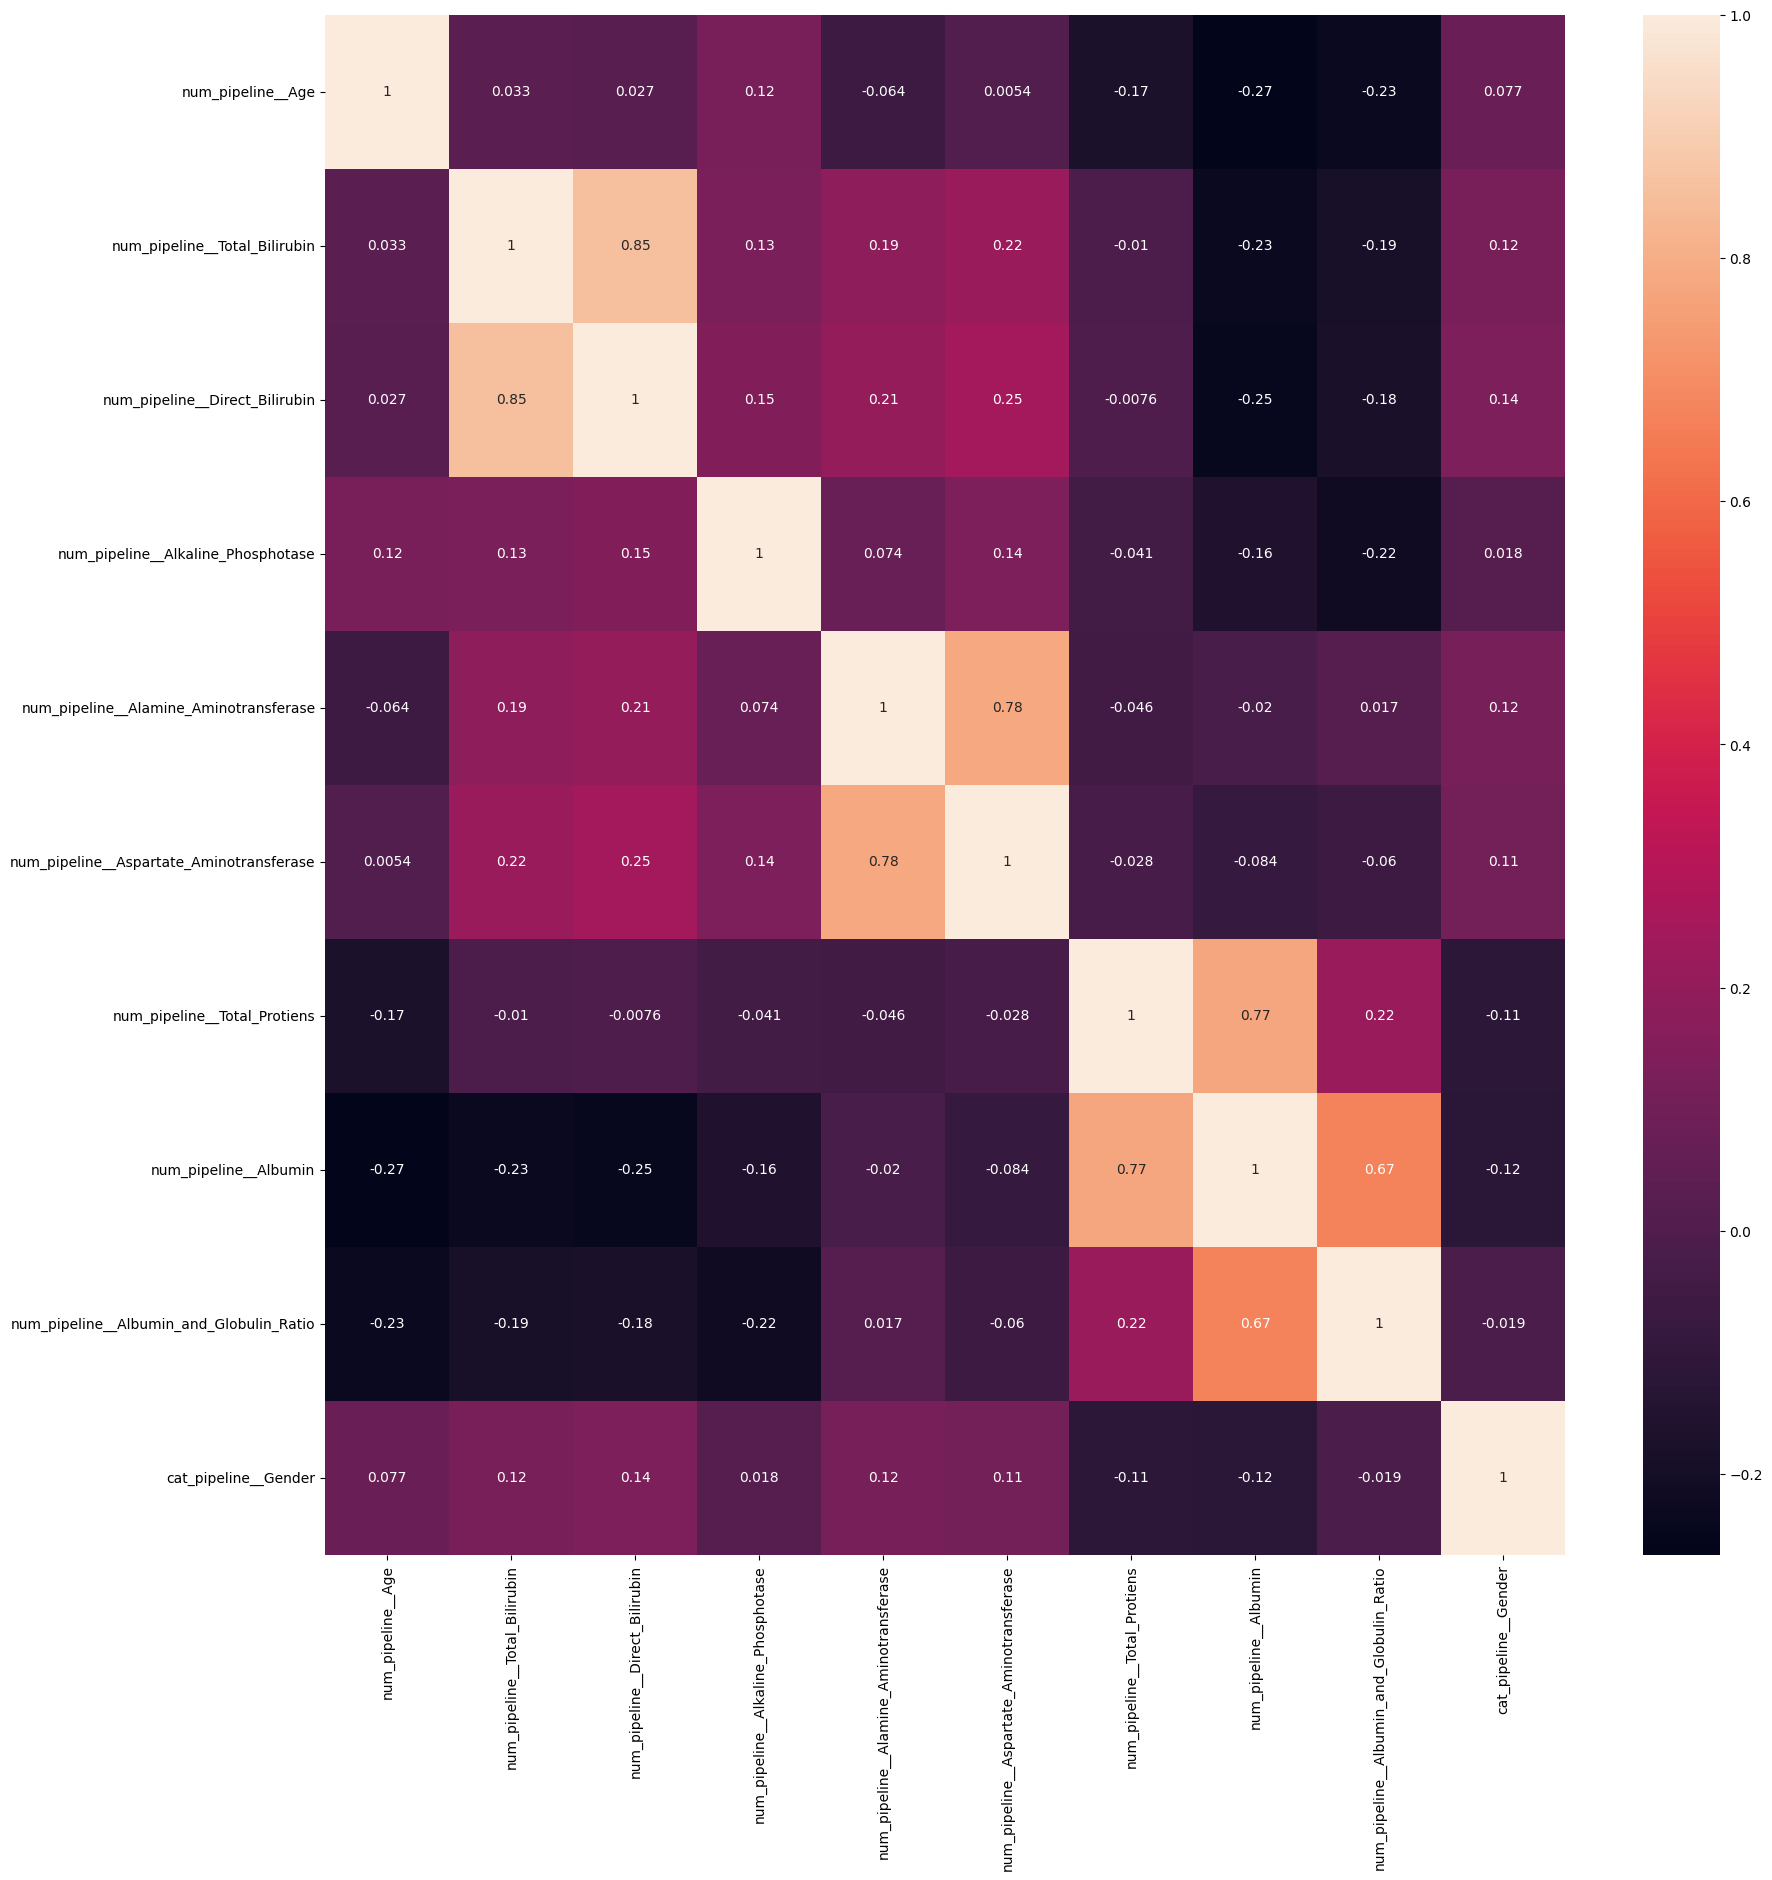

In [42]:
##correlation
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    a_score = accuracy_score(y_test,y_pred)
    return mae, rmse, a_score

In [52]:
## Train multiple models
models = {
          "Random Forest":RandomForestClassifier(),
          "Decision Tree":DecisionTreeClassifier(),
          "Logistic":LogisticRegression(),
          "SVM":SVC(),
          "Ada Boost": AdaBoostClassifier()
}    
trained_model_list=[]
model_list=[]
accuracy_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, a_score=evaluate_model(y_test,y_pred)
    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("accuracy_score: ",a_score)
    print(classification_report(y_test, y_pred))
    

    accuracy_list.append(a_score)
    
    print('='*35)
    print('\n')

C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_9508\220498114.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest
Model Training Performance
RMSE: 0.4978586625371179
MAE: 0.24786324786324787
accuracy_score:  0.7521367521367521
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        87
           2       0.52      0.40      0.45        30

    accuracy                           0.75       117
   macro avg       0.67      0.64      0.65       117
weighted avg       0.73      0.75      0.74       117



Decision Tree
Model Training Performance
RMSE: 0.5547001962252291
MAE: 0.3076923076923077
accuracy_score:  0.6923076923076923
              precision    recall  f1-score   support

           1       0.81      0.76      0.79        87
           2       0.42      0.50      0.45        30

    accuracy                           0.69       117
   macro avg       0.62      0.63      0.62       117
weighted avg       0.71      0.69      0.70       117



Logistic
Model Training Performance
RMSE: 0.48919959047022854
MAE: 0.23931623931623933
ac

c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<AxesSubplot: >

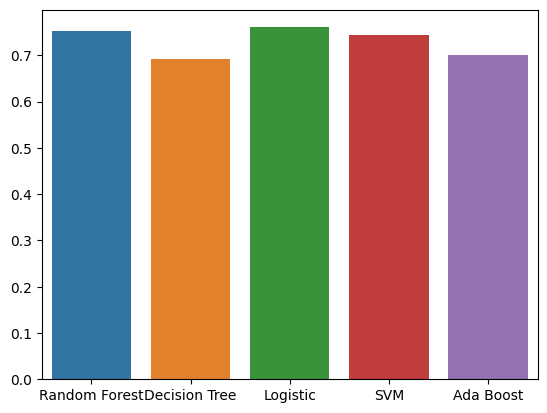

In [53]:
sns.barplot(x=model_list,y=accuracy_list)